# BMI AND ALCOHOL CONSUMPTION IN IRELAND
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a step by step simulated dataset of a relationship between BMI and Alcohol consumption in Ireland. The data is modeled and synthesised using *numpy.random* package in Python. 

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms and height in metres. [1]  It is widely used to diagnose whether individuals are underweight, overweight, or obese. [2] BMI is accepted as the most useful indicator of obesity in adults when only weight and height data are available. [10] Alcohol consumption is often linked to a high weight. Drinking more than seven times per week was associated with increased risk of weight gain and development of overweight and obesity. [3]

This project is separated into the three sections. First section is a Research section, where I'll explain what each variable represents and it's real life properties. In second section, Simulation, I will simulate each of the variables based on the research done. Data Analysis is the last section and here I will analyse the generated database and see if and how it reflects the real life. 

<center><img src="https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg" width="300"/></center>



### CONTENTS

- [RESEARCH](#RESEARCH)
- [SIMULATION](#SIMULATION)
- [DATA ANALYSIS](#ANALYSIS)
***

## RESEARCH
<hr style="border:2px solid gray"> </hr>

The goal of this project is to create a dataset that will reflect the real life, with its destribution and relationships. This section shows what the properties of each variable that will get generated are.


In [1]:
# Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.style.use("ggplot")

In [3]:
np.random.seed(2021)

#### ID

The simulated database will be a sample of a population taken for a reasearch purposes. ID in this dataset will represent each person in the sample. There were two approaches considered for this project, to either create a list of numbered persons (e.g. Person 1, Person 2, ...)  or name each individual. I've opted for the second one, but both will be shown below.

#### GENDER

Gender is a categorical variable [5] and it can have two values: *male* and *female*. According to the latest World Bank data from 2020., percentage of female in Irish population is 50.4% [6] Male population is then 49.6%. I will use *random.choice* function to generate this data. For the sake of this project, I will round these percentages to 51% for female and 49% for male.

#### AGE

Age is a quantitative continuous variable. [11] Based on my research, it seem to follow normal distribution, if taken from the whole population, but a skewed one if taken of the sample of population. The avarage age in Ireland in 2020. was 38.2. [7] I will use Normal distribution to generate this data, but have the range set to match the mentioned properties.

#### HEIGHT AND WEIGHT

Both height and weight are normally distributed. There is also a strong relationship between the two. As height increases, weight also tends to increase. [8] The avarage male height is 1.79m and weight is 89.2kg. Avarage female height is 1.64m and avarage weight is 73.1kg. [9]  Both variables are generated at the same time, with set correlation between them. They are also generated separately for each gender. I will use *multivariate_normal* function for this purpose. This will create normally distributed correlated data.

#### BMI

As mentioned before, BMI is a value calculated from persons height and weight. The formula is weight in kilograms divided by height in meters squared. I will generate this data using the mentioned formula.

#### BMI CLASSIFICATION

There are a few different ranges used for BMI classification. The following subdivisions are used to categorise the BMI in Europe: [10]

| BMI (kg/m^2)| CLASSIFICATION |
| :- | :- |
| \< 18.5 | underweight |
| \>= 18.5 and < 25 | normal weight |
| \>= 25 | overweight |
| \>= 30 | obese |

Ireland has one of the highest levels of obesity in Europe, with 60% of adults living with overweight and obesity. [12] We'll see in data analysis if using the reasearched properties will result in these figures.

#### ALCOHOL CONSUMPTION

As already stated, there are researches showing how alcohol consumption is closely linked to BMI, in particular with weight. Average BMI is increased with an increased level of alcohol consumption in men and women. [4] Gamma distribution is recommended to model alcohol consumption from population surveys due to its fit, flexibility, and the ease with which it can be modified. [13] Scale and shape for Gamma distribution for female in Ireland are 15.55 and 0.91, and for man 38.58 and 0.98 [14,15] I haven't been able to find a fitting function or a code in Python (numpy) to create a correlated data with any distribution other then the normal one. I've decided to generate this data using the normal distribution, matching the gamma one as close as possible. Test to see if this will produce the wanted result is shown below.

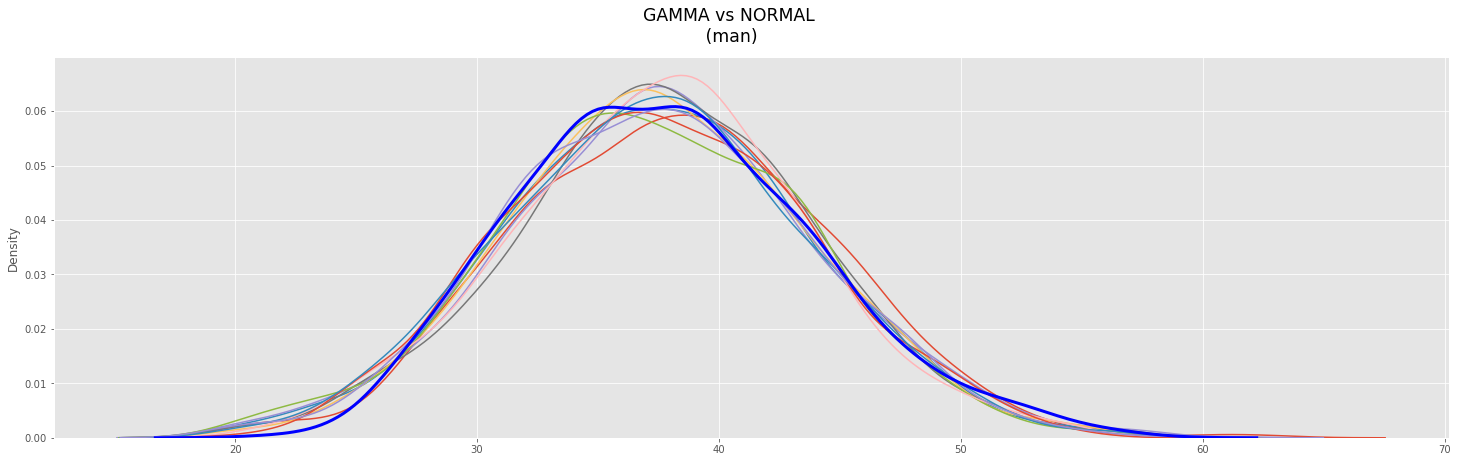

In [28]:
# Testing if normal distribution can be used to generate alcohol consuption.
    # Plot 10 normal kde plots.
for i in range (10):
    rng = np.random.default_rng()
    n = []
    for i in range(1000):
        a = np.clip(np.random.normal(37.5, 6.3), 20, 100)
        n.append((a))
    sns.kdeplot(n, alpha = 0.7)
    # Plot gamma kde plot.
g = rng.gamma(38.57,0.98, 1000)
sns.kdeplot (g, linewidth = 3, color = "b")
plt.suptitle ("GAMMA vs NORMAL\n (man)", size = "xx-large")
plt.show()

We can see on the plot that gamma distribution has a bell curve, slightly skewed to the left (blue line). All the other lines are randomly generated values in normal distribution and it is visible that they very closely match the gamma distribution. Therefore, normal distribution is deemed to be good for generating alcohol consumption. Considering it is correlated with weight it will be generated with height and weight using *multivariate_normal* function.

In [5]:
# Random number generator.
rng = np.random.default_rng(seed = 1)

df = pd.DataFrame(index=None)

### 1. ID

This variable will represent each person in the final dataset. There are 2 different approaches that were considered for this project:
- Creating a list of numerated persons
- Creating a list of person's names

Both are shown below. The second has been selected for the final database. This variable will be assigned 

In [6]:
# Creating a list of numerated persons.
person = []
for i in range (1, 11):
    person.append ("Person {}".format(i))
person

['Person 1',
 'Person 2',
 'Person 3',
 'Person 4',
 'Person 5',
 'Person 6',
 'Person 7',
 'Person 8',
 'Person 9',
 'Person 10']

In [7]:
# Creating a list of names. [1]
for i in range(10):
    print(names.get_full_name())

Edward Dewall
Glenda Abbott
Helen Speegle
William Deyoung
Michael Rufi
Joseph Stephens
Sandra Matlock
Allison Hersey
Alberta Drown
Jesus Frederick


### 2. GENDER

Gender is a categorical variable [5] and it can have two values: *male* and *female*. According to the latest World Bank data from 2020., percentage of female in Irish population is 50.4% [6] Male population is then 49.6%. I've used *random.choice* function to generate this data. For the sake of this project, I've decided to round these percentages.

In [8]:
# Generating gender with set probability.
gender_choice = ["Female", "Male"]
gender = rng.choice (gender_choice, p = [0.51, 0.49], size = 1000)
df["gender"] = gender
df["gender"].value_counts()

Female    515
Male      485
Name: gender, dtype: int64

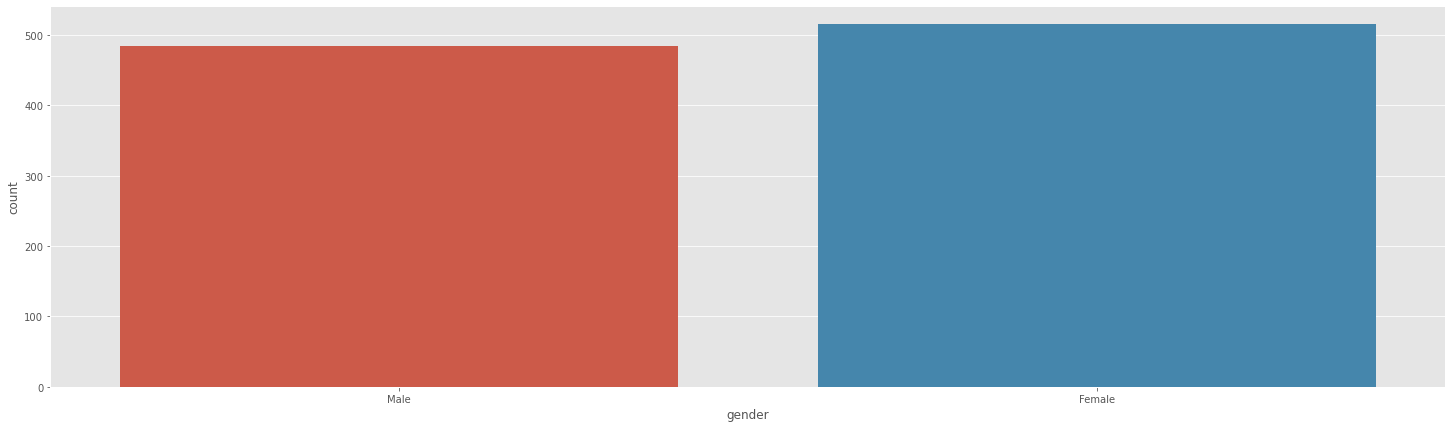

In [9]:
sns.countplot(x = df["gender"])
plt.show()

### 3. AGE

The age seem to follow normal distribution, if taken from the whole population, but a skewed one if taken of the sample of population. However, age cannot be a negative number which is allowed by Normal distribution. [] With this in mind, I've decided to use the Normal distribution but set the range to avoid the mentioned. The avarage age in Ireland in 2020. was 38.2. [7] The age range was set to be 18 to 100.

In [10]:
# Generating age using normal distribution (but clipping the data) [2]
age = []
for i in range(1000):
    a = np.clip(np.random.normal(38.2, 15), 18, 100)
    age.append(int(a))
df["age"] = age
# Current dataset
df.head()

,gender,age
0,Male,57
1,Male,35
2,Female,33
3,Male,53
4,Female,18


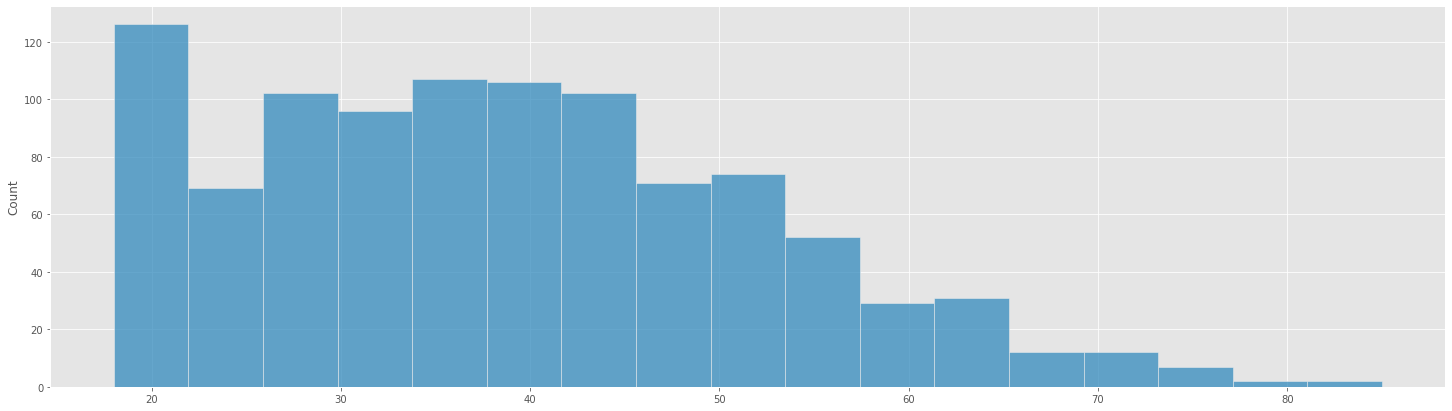

In [11]:
sns.histplot (age)
plt.show()

### 4. HEIGHT, WEIGHT AND ALCOHOL CONUSMPTION

Both height and weight are normally distributed. There is also a strong relationship between height and weight. As height increases, weight also tends to increase. [8] The avarage male height is 1.79m and weiht is 89.2kg. Avarage female height is 1.64m and avarage weight is 73.1kg. [9]  Both variables are generated at the same time, with set correlation between them. They are also generated separately for each gender.

In [12]:
# Defining a function.
def applyFunc(s):
    if s == "Male": # If male.
        # Create an array of height and weight.
        m_means = [179, 85, 38.57] # mean for height and weight.
        m_stds = [5, 5, 5] #standard deviation
        m_corr = 0.6 # correlation
        m_pcorr = 0.3
        m_ncorr = 0.1
        m_covs = [[m_stds[0]**2, m_stds[0]*m_stds[1]*m_corr, m_stds[0]*m_stds[2]*m_ncorr], 
                [m_stds[0]*m_stds[1]*m_corr, m_stds[1]**2, m_stds[1]*m_stds[2]*m_pcorr ],
                [m_stds[0]*m_stds[2]*m_ncorr, m_stds[1]*m_stds[2]*m_pcorr, m_stds[2]**2 ]]
        m_data = rng.multivariate_normal(m_means, m_covs)       
        m_data = m_data.round(1)
        return m_data[0], m_data[1], m_data[2]
    if s == "Female": # If female.
         # Create an array of height and weight.
        f_means = [164, 65, 15] # mean for height and weight.
        f_stds = [5, 5, 5] #standard deviation
        f_corr = 0.6 # correlation
        f_ncorr = 0.1
        f_pcorr = 0.3
        f_covs = [[f_stds[0]**2, f_stds[0]*f_stds[1]*f_corr, f_stds[0]*f_stds[2]*f_ncorr], 
                [f_stds[0]*f_stds[1]*f_corr, f_stds[1]**2, f_stds[1]*f_stds[2]*f_pcorr ],
                [f_stds[0]*f_stds[2]*f_ncorr, f_stds[1]*f_stds[2]*f_pcorr, f_stds[2]**2 ]] 
        f_data = rng.multivariate_normal(f_means, f_covs)       
        f_data = f_data.round(1)
        return f_data[0], f_data[1], f_data[2]

# Create an array based on gender
height_weight = df["gender"].apply(applyFunc)
# Assign array elements [3]
df["height"]= height_weight.str[0]
df["weight"]= height_weight.str[1]
df["alcohol_con"]= height_weight.str[2]
# Current dataset
df.head()

,gender,age,height,weight,alcohol_con
0,Male,57,181.7,86.0,45.4
1,Male,35,182.0,82.2,33.9
2,Female,33,161.3,67.9,18.4
3,Male,53,173.1,74.3,29.5
4,Female,18,164.3,67.3,16.5


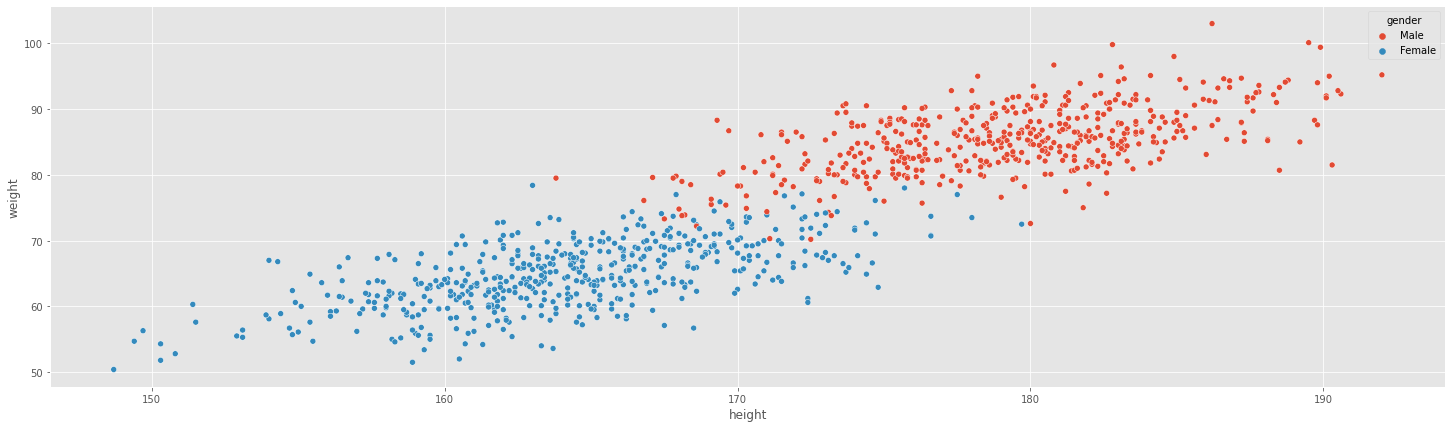

In [13]:
sns.scatterplot (x = df["height"], y = df["weight"], hue = df["gender"])
plt.show()

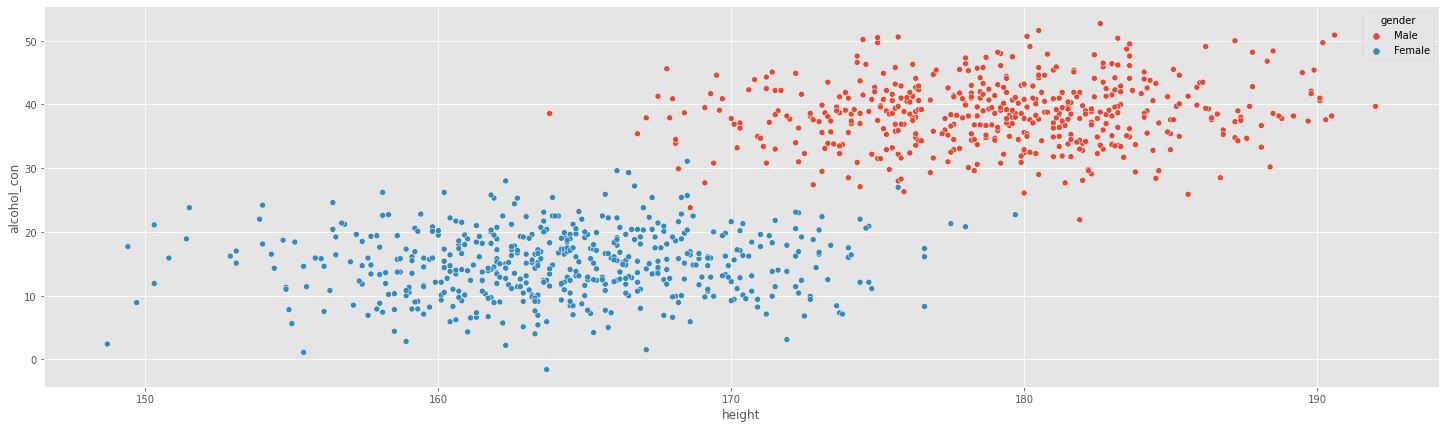

In [14]:
sns.scatterplot (x = df["height"], y = df["alcohol_con"], hue = df["gender"])
plt.show()

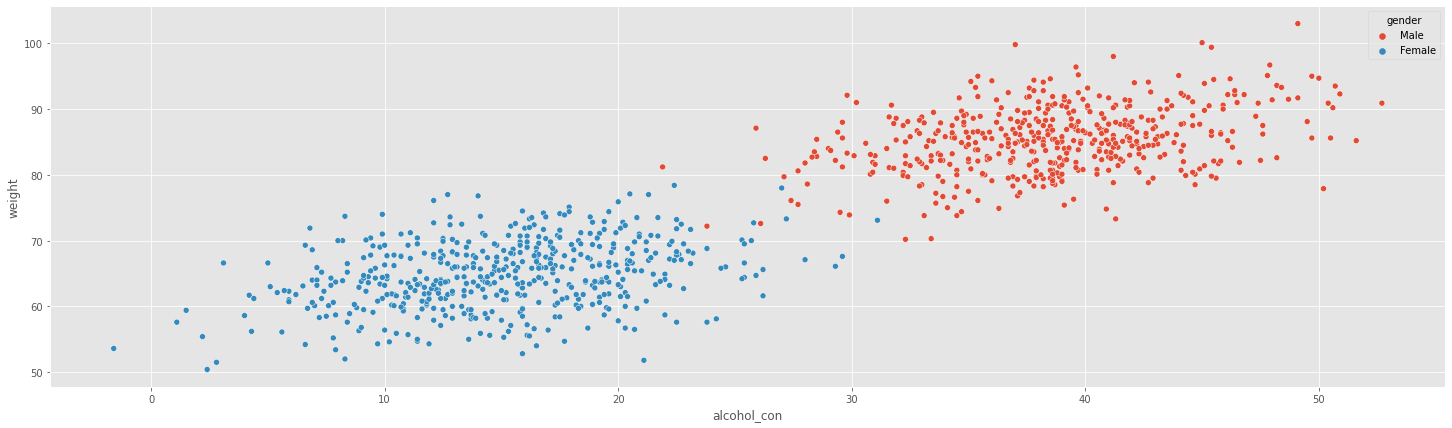

In [15]:
sns.scatterplot (x = df["alcohol_con"], y = df["weight"], hue = df["gender"])
plt.show()

### BMI

In [16]:
df["bmi"] = (df["weight"] / ((df["height"])/100)**2).round(1)
df.head()

,gender,age,height,weight,alcohol_con,bmi
0,Male,57,181.7,86.0,45.4,26.0
1,Male,35,182.0,82.2,33.9,24.8
2,Female,33,161.3,67.9,18.4,26.1
3,Male,53,173.1,74.3,29.5,24.8
4,Female,18,164.3,67.3,16.5,24.9


### BMI CLASSIFICATION

In [17]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Obese"
df["bmi_class"] = df["bmi"].apply(applyFunc)
df["bmi_class"].value_counts()

Overweight        564
Healthy weight    432
Obese               4
Name: bmi_class, dtype: int64

In [18]:
df

,gender,age,height,weight,alcohol_con,bmi,bmi_class
0,Male,57,181.7,86.0,45.4,26.0,Overweight
1,Male,35,182.0,82.2,33.9,24.8,Healthy weight
2,Female,33,161.3,67.9,18.4,26.1,Overweight
3,Male,53,173.1,74.3,29.5,24.8,Healthy weight
4,Female,18,164.3,67.3,16.5,24.9,Healthy weight
...,...,...,...,...,...,...,...
995,Male,37,171.0,74.4,34.7,25.4,Overweight
996,Male,52,177.3,92.8,37.8,29.5,Overweight
997,Female,18,166.1,67.6,29.6,24.5,Healthy weight
998,Male,34,183.6,88.1,49.5,26.1,Overweight


<AxesSubplot:xlabel='bmi_class', ylabel='count'>

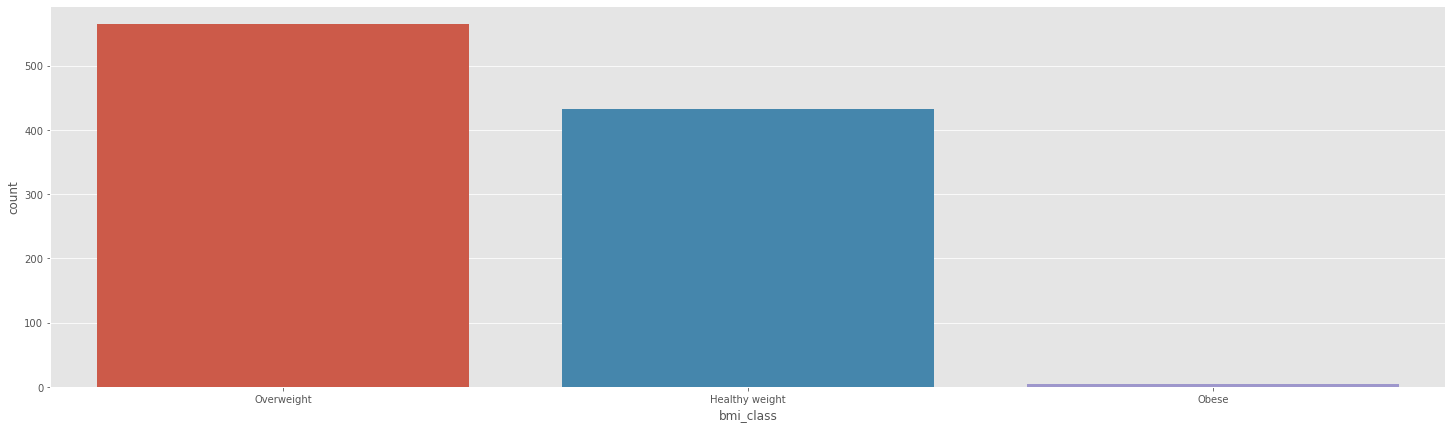

In [19]:
sns.countplot (x = df["bmi_class"])

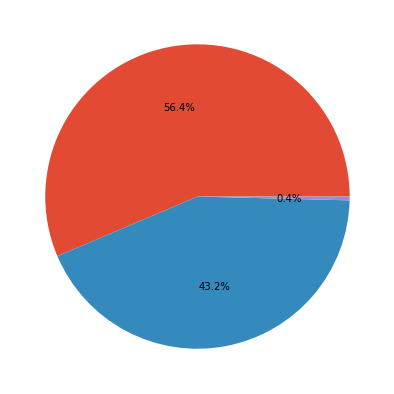

In [20]:
count = df["bmi_class"].value_counts()
plt.pie(count, autopct='%1.1f%%')
plt.show()

### NAMES

In [21]:
rand_name = names.get_full_name(gender='male')

In [22]:
def applyFunc(s):
    if s == "Male":
        male_name = names.get_full_name(gender='male')
        return male_name
    elif s == "Female":
        female_name = names.get_full_name(gender='female')
        return female_name
names = df["gender"].apply(applyFunc)
df.insert(0, "name", names)

In [23]:
df

,name,gender,age,height,weight,alcohol_con,bmi,bmi_class
0,Albert Hodges,Male,57,181.7,86.0,45.4,26.0,Overweight
1,Theodore Garrett,Male,35,182.0,82.2,33.9,24.8,Healthy weight
2,Angelica Miller,Female,33,161.3,67.9,18.4,26.1,Overweight
3,Tommy Morales,Male,53,173.1,74.3,29.5,24.8,Healthy weight
4,Carole Freeman,Female,18,164.3,67.3,16.5,24.9,Healthy weight
...,...,...,...,...,...,...,...,...
995,Donald Hooker,Male,37,171.0,74.4,34.7,25.4,Overweight
996,Dewey Fitzpatrick,Male,52,177.3,92.8,37.8,29.5,Overweight
997,Sonya Borges,Female,18,166.1,67.6,29.6,24.5,Healthy weight
998,George Monton,Male,34,183.6,88.1,49.5,26.1,Overweight


In [24]:
df.describe()

,age,height,weight,alcohol_con,bmi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.488000,171.456200,74.773800,26.441500,25.28150
std,13.880437,9.004243,11.420622,12.876086,1.94057
min,18.000000,148.700000,50.400000,-1.600000,20.00000
25%,28.000000,163.900000,64.400000,14.800000,23.97500
50%,37.500000,171.350000,73.600000,24.500000,25.30000
75%,48.000000,179.200000,85.125000,38.500000,26.70000
max,85.000000,192.000000,103.000000,52.700000,30.80000


<AxesSubplot:xlabel='alcohol_con', ylabel='Count'>

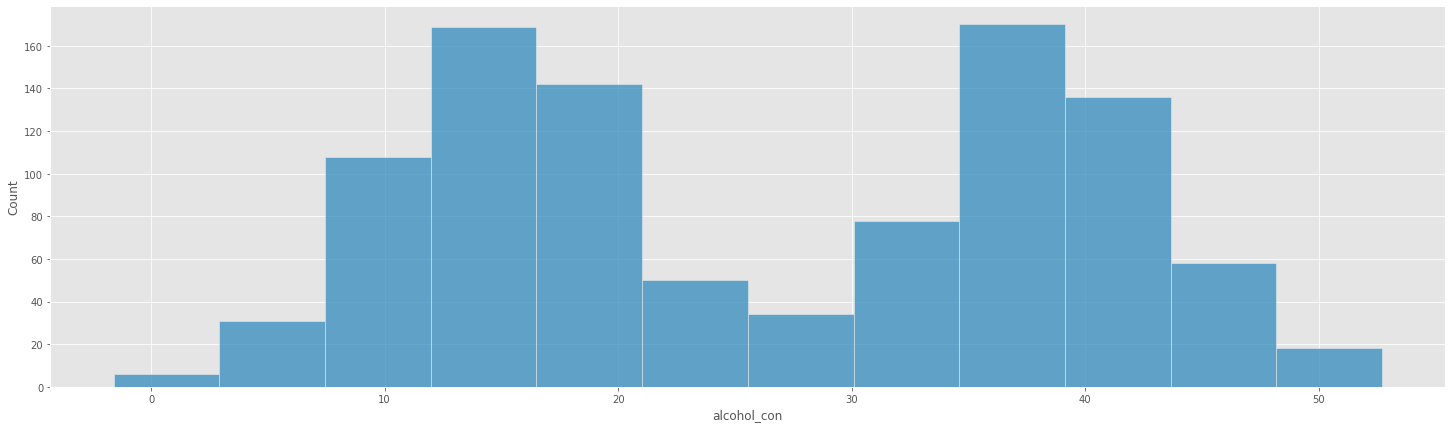

In [25]:
sns.histplot (data = df["alcohol_con"])

## REFERENCES

### MAIN

- [1] https://en.wikipedia.org/wiki/Body_mass_index
- [2] https://www.hindawi.com/journals/tswj/2012/849018/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4338356/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6484200/
- [5] https://builtin.com/data-science/data-types-statistics
- [6] https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?locations=IE
- [7] https://www.worldometers.info/world-population/ireland-population/
- [8] https://statisticsbyjim.com/basics/correlations/
- [9] https://www.worlddata.info/average-bodyheight.php
- [10] https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Body_mass_index_(BMI)
- [11] https://www.mayo.edu/research/documents/data-types/doc-20408956
- [12] https://www.hse.ie/eng/about/who/cspd/ncps/obesity/
- [13] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6
- [14] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6/tables/1
- [15] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6/tables/2

### CODE

- [1] https://moonbooks.org/Articles/How-to-generate-random-names-first-and-last-names-with-python-/
- [2] https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal
- [3] https://stackoverflow.com/questions/29550414/how-can-i-split-a-column-of-tuples-in-a-pandas-dataframe
- [4]
- [5] https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy


OTHER


AGE
- https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib
- http://www.talkstats.com/threads/can-age-be-treated-as-normally-distributed.11875/

### IMAGES

- https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg